In [1]:
import sys
sys.path.append("../")

In [2]:
from utils.common_train_utils import *
from utils.draw_candle_image import *
from utils.evaluate_old_models import *
from functools import partial
import os
from tabulate import tabulate
import random
import warnings
warnings.filterwarnings("ignore")
import keras


In [3]:
model = keras.models.load_model(f"../dataset/btc_with_ema_macd_trend/model_save/channels_to_time_step_attention_ema_macd_trend/channels_to_time_step_attention_ema_macd_trend.keras")

In [5]:
model.layers[1:4]

[<Conv2D name=conv2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>]

In [7]:
config = read_config("../dataset/btc_with_ema_macd_trend")
candle_type_and_directory_save: dict = config["candle_type_and_directory_save"]

In [9]:
dataset_test = load_dataset_of_each_type_and_combine("../dataset/btc_with_ema_macd_trend/test", candle_type_and_directory_save)

In [11]:
len(dataset_test)

62

In [25]:
dataset_test_2 = dataset_test.batch(32)
transform_function = partial(get_open_close_prices_percent_of_last_days_result_for_ema_macd_trend_dataset, 3)
dataset_test_3 = dataset_test_2.map(transform_function)

In [26]:
dataset_test_3

<_MapDataset element_spec=((TensorSpec(shape=(None, 2), dtype=tf.float64, name=None), TensorSpec(shape=(None, 2), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1), dtype=tf.int32, name=None), TensorSpec(shape=(None, 287, 287, 3), dtype=tf.float64, name=None)), TensorSpec(shape=(None, 3, 2), dtype=tf.float64, name=None))>

In [72]:
for ((arctan_diff_1_ema_9, arctan_diff_1_macd_history, trend_type_values, features), percent_change_of_open_close) in dataset_test_3:
    print(features.shape)

(32, 287, 287, 3)
(30, 287, 287, 3)


In [73]:
take_arctan_diff_1_ema_9 = arctan_diff_1_ema_9[19:20]
take_arctan_diff_1_macd_history = arctan_diff_1_macd_history[19:20]
take_trend_type_values = trend_type_values[19:20]
take_features = features[19:20]
take_percent_change_of_open_close = percent_change_of_open_close[19:20]

In [40]:
for i, (list_ema_9, 
        list_macd_history, 
        list_trend_type_values, 
        list_images, 
        list_targets, 
        list_dates) in enumerate(dataset_test):
    if list_dates.numpy() == b"2024-09-14 00:00:00+00:00":
        print(i)
        break
    
    

53


(-0.5, 286.5, 286.5, -0.5)

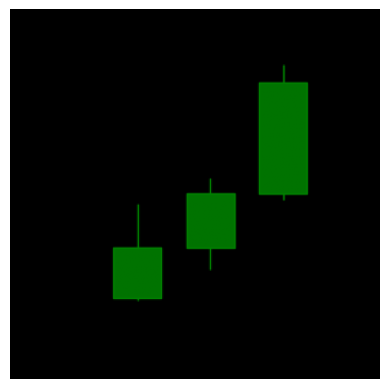

In [75]:
plt.imshow(take_features[0])
plt.axis("off")

In [56]:
model_truncate_1 = keras.Sequential(model.layers[:2])
model_truncate_2 = keras.Sequential(model.layers[:3])
model_truncate_3 = keras.Sequential(model.layers[:4])


In [58]:
model_truncate_1.summary()
model_truncate_2.summary()
model_truncate_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 286, 286, 8)    │           104 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104 (416.00 B)

 Trainable params: 104 (416.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 286, 286, 8)    │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 285, 285, 3)    │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203 (812.00 B)

 Trainable params: 203 (812.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 286, 286, 8)    │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 285, 285, 3)    │            99 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 142, 142, 3)    │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203 (812.00 B)

 Trainable params: 203 (812.00 B)

 Non-trainable params: 0 (0.00 B)

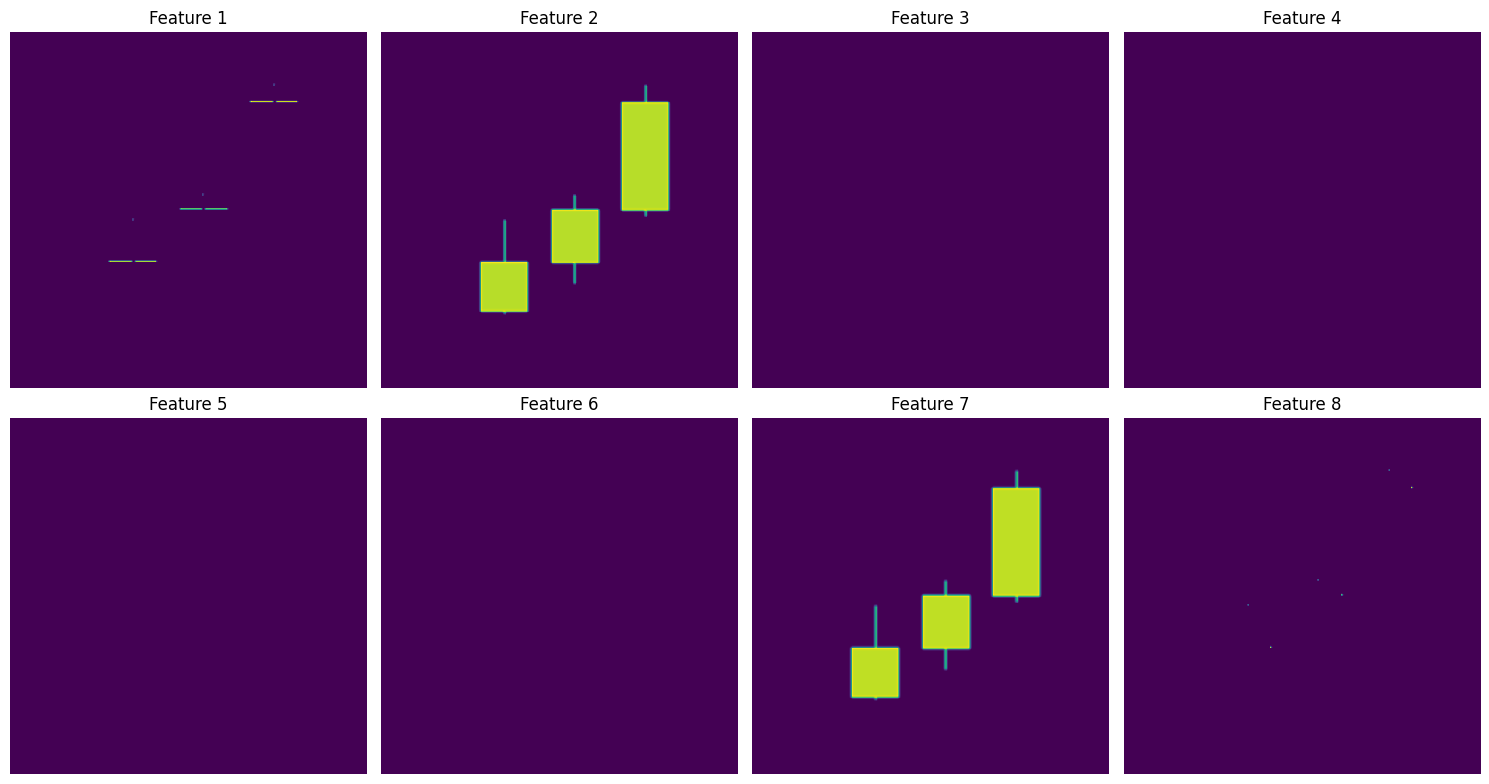

In [69]:
num_images = 8

# Tạo figure
plt.figure(figsize=(15, 8))  # Điều chỉnh kích thước phù hợp

for i in range(num_images):
    plt.subplot(2, 4, i + 1)  # Tạo grid 2 hàng, 4 cột
    plt.imshow(model_truncate_1(take_features)[0][:, :, i])
    plt.title(f"Feature {i+1}")  # Thêm tiêu đề nếu cần
    plt.axis("off")  # Bỏ trục

plt.tight_layout()  # Tự động điều chỉnh khoảng cách giữa các subplots
plt.show()

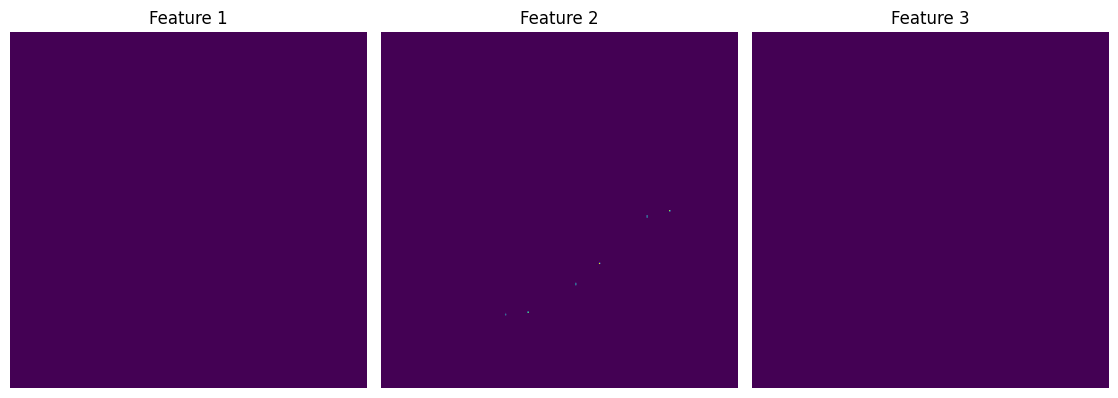

In [70]:
num_images = 3

# Tạo figure
plt.figure(figsize=(15, 8))  # Điều chỉnh kích thước phù hợp

for i in range(num_images):
    plt.subplot(2, 4, i + 1)  # Tạo grid 2 hàng, 4 cột
    plt.imshow(model_truncate_2(take_features)[0][:, :, i])
    plt.title(f"Feature {i+1}")  # Thêm tiêu đề nếu cần
    plt.axis("off")  # Bỏ trục

plt.tight_layout()  # Tự động điều chỉnh khoảng cách giữa các subplots
plt.show()

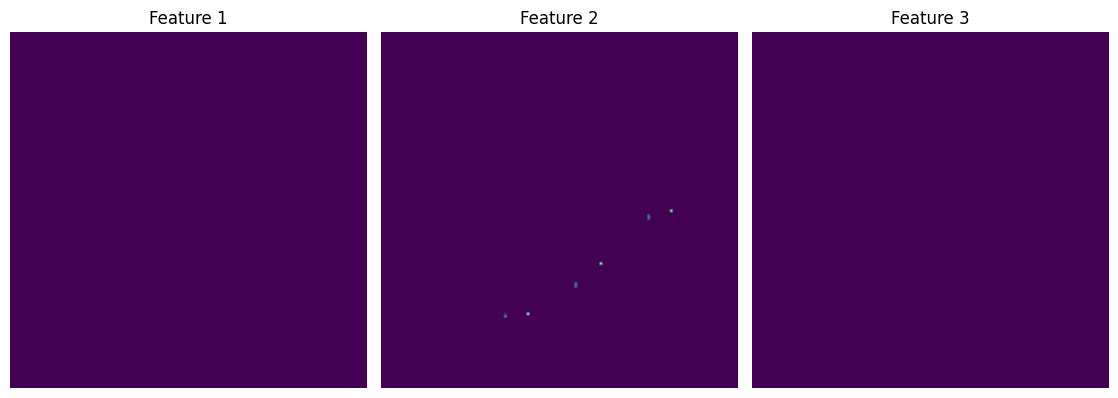

In [71]:
num_images = 3

# Tạo figure
plt.figure(figsize=(15, 8))  # Điều chỉnh kích thước phù hợp

for i in range(num_images):
    plt.subplot(2, 4, i + 1)  # Tạo grid 2 hàng, 4 cột
    plt.imshow(model_truncate_3(take_features)[0][:, :, i])
    plt.title(f"Feature {i+1}")  # Thêm tiêu đề nếu cần
    plt.axis("off")  # Bỏ trục

plt.tight_layout()  # Tự động điều chỉnh khoảng cách giữa các subplots
plt.show()

In [22]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, 287, 287,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 286, 286,  │        104 │ image_input[0][0] │
│                     │ 8)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 285, 285,  │         99 │ conv2d[0][0]      │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 142, 142,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ permute (Permute)   │ (None, 3, 142,    │          0 │ max_pooling2d[0]… │
│                     │ 142)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ema_9_input         │ (None, 2)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ macd_history_input  │ (None, 2)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ trend_type_input    │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed    │ (None, 3, 20164)  │          0 │ permute[0][0]     │
│ (TimeDistributed)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 8)         │         24 │ ema_9_input[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 8)         │         24 │ macd_history_inp… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 8)         │         16 │ trend_type_input… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed_1  │ (None, 3, 64)     │  1,290,560 │ time_distributed… │
│ (TimeDistributed)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector_1     │ (None, 3, 8)      │          0 │ dense_1[0][0]     │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector_2     │ (None, 3, 8)      │          0 │ dense_2[0][0]     │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector       │ (None, 3, 8)      │          0 │ dense[0][0]       │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed_2  │ (None, 3, 64)     │          0 │ time_distributed… │
│ (TimeDistributed)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 3, 88)     │          0 │ repeat_vector_1[

 Total params: 5,679,244 (21.66 MB)

 Trainable params: 1,893,081 (7.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,786,163 (14.44 MB)